# Project: Heart Disease Prediction (Predicting Heart Disease using Machine Learning)

## 1.1 Phát biểu bài toán
Bệnh tim là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, và việc chẩn đoán sớm có thể cứu sống nhiều người. Dự án này sử dụng tập dữ liệu Cleveland từ thư viện UCI Machine Learning Repository, bao gồm các thông tin về các bệnh nhân và các yếu tố có thể liên quan đến nguy cơ mắc bệnh tim.

Tập dữ liệu này bao gồm 303 bản ghi và 14 thuộc tính, bao gồm các chỉ số sức khỏe như tuổi tác, giới tính, mức độ cholesterol, huyết áp, tình trạng bệnh tim trước đó và các yếu tố nguy cơ khác. Mục tiêu là xây dựng một mô hình dự đoán khả năng mắc bệnh tim, phân loại bệnh nhân vào hai nhóm: có bệnh tim hoặc không có bệnh tim.

## 1.2 Mô tả vấn đề
Sử dụng tập dữ liệu Cleveland để xây dựng một mô hình học máy nhằm dự đoán khả năng mắc bệnh tim dựa trên các yếu tố nguy cơ. Mô hình sẽ phân loại các bệnh nhân thành hai nhóm: có bệnh tim hoặc không có bệnh tim.

##1.3 Giả thuyết
Một số yếu tố có thể ảnh hưởng đến khả năng mắc bệnh tim:

- Tuổi: Tuổi tác có thể ảnh hưởng lớn đến nguy cơ mắc bệnh tim, với người cao tuổi có nguy cơ mắc bệnh cao hơn.
- Cholesterol trong máu: Mức cholesterol cao có thể dẫn đến các vấn đề về tim mạch.
- Huyết áp: Huyết áp cao có thể làm tăng nguy cơ mắc bệnh tim.
- Loại đau ngực: Các cơn đau ngực có thể là dấu hiệu của bệnh tim.
- Tình trạng thalassemia: Đây là một yếu tố di truyền có thể ảnh hưởng đến sức khỏe tim mạch.

### 1.4.1 General Overview: Tổng quan chung về dữ liệu
Dữ liệu có tổng cộng 303 bản ghi và 14 thuộc tính.
Các thuộc tính bao gồm các giá trị liên quan đến tình trạng sức khỏe và các yếu tố nguy cơ của bệnh nhân.
### 1.4.2 Exploratory Data Analysis (EDA): Phân tích dữ liệu thăm dò

Phân tích phân phối của các thuộc tính (histogram, boxplot).
Xác định các giá trị thiếu (missing values) và xử lý chúng.
Kiểm tra mối quan hệ giữa các thuộc tính và mục tiêu (Target) bằng các biểu đồ tương quan (correlation heatmap, scatter plot).

### 1.4.3 Data Preprocessing: Tiền xử lý dữ liệu
- Xử lý dữ liệu thiếu: Nếu có giá trị thiếu, sẽ có các phương pháp như loại bỏ dòng hoặc điền giá trị trung bình/mediana tùy vào tính chất dữ liệu.
- Chuyển đổi dữ liệu phân loại: Các thuộc tính phân loại (ví dụ: "Sex", "Chest pain type", "Thalassemia") cần được mã hóa thành các giá trị số (One-hot encoding hoặc Label Encoding).
- Chuẩn hóa dữ liệu: Các thuộc tính như huyết áp, cholesterol cần được chuẩn hóa để đưa về cùng một thang đo (sử dụng StandardScaler hoặc MinMaxScaler).

- Chia tập dữ liệu: Tách dữ liệu thành tập huấn luyện và tập kiểm tra (train-test split).

### 1.4.4 Model Building: Xây dựng mô hình học máy

Sử dụng các thuật toán học máy để xây dựng mô hình phân loại : 
- logistic regression
- KNN
- Rondamforest

### 1.4.5 Hyperparameter Tuning: Điều chỉnh tham số mô hình

Sử dụng Grid Search hoặc Random Search để tìm kiếm các tham số tối ưu cho mô hình.
Điều chỉnh các tham số như số lượng cây trong Random Forest, tham số C trong SVM, hoặc mức độ sâu của cây quyết định.

### 1.4.6 Model Performance: Đánh giá hiệu suất mô hình

Accuracy: Tính toán độ chính xác của mô hình.
Precision, Recall, F1-score: Đánh giá mô hình theo các chỉ số này, đặc biệt trong trường hợp mất cân bằng lớp (class imbalance).
ROC Curve và AUC: Đánh giá mô hình qua đồ thị ROC và diện tích dưới đường cong (AUC).

###  1.4.7 Save the model: Lưu mô hình có hiệu suất tốt nhất

Sau khi tìm được mô hình tốt nhất, lưu mô hình sử dụng thư viện như joblib hoặc pickle để có thể tái sử dụng sau này.

### 1.4.8 Predictions: Đưa ra dự đoán trên tập dữ liệu kiểm tra

Sử dụng mô hình đã huấn luyện để đưa ra dự đoán trên tập kiểm tra.
Kiểm tra độ chính xác của mô hình dựa trên dữ liệu kiểm tra.

# 2. Tiến hành thực hiện

In [382]:
# import các thư viên cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [383]:
# đọc file dữ liệu và gắn tên cột cho dữ liệu

df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


1. age - tuổi
2. sex - (1 = nam; 0 = nữ) 
3. cp - loại đau ngực
    * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
    * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
    * 2: Đau không do tim: thường là co thắt thực quản (không liên quan đến tim)
    * 3: Không có triệu chứng: đau ngực không có dấu hiệu bệnh
4. trestbps - huyết áp khi nghỉ ngơi (mm Hg khi nhập viện)
    * bất cứ điều gì trên 130-140 thường là nguyên nhân gây lo ngại
5. chol - lượng cholesterol trong máu (mg/dl)
    * cholesterol = LDL + HDL + .2 * triglycerides
    * trên 200 là nguyên nhân gây lo ngại
6. fbs - (đường huyết lúc đói > 120 mg/dl) (1 = đúng; 0 = sai)
    * '>126' mg/dL báo hiệu bệnh tiểu đường
7. restecg - kết quả điện tâm đồ khi nghỉ ngơi
    * 0: Không có gì đáng chú ý
    * 1: Bất thường sóng ST-T
        - có thể từ triệu chứng nhẹ đến vấn đề nghiêm trọng
        - báo hiệu nhịp tim không bình thường
    * 2: Có thể hoặc chắc chắn phì đại thất trái
        - buồng bơm chính của tim bị phì đại
8. thalach - nhịp tim tối đa đạt được
9. exang - đau thắt ngực do tập thể dục (1 = có; 0 = không)
10. oldpeak - ST giảm do tập thể dục so với khi nghỉ ngơi
    * xem xét căng thẳng của tim khi tập thể dục
    * tim không khỏe sẽ căng thẳng hơn
11. slope - độ dốc của đoạn ST khi tập thể dục
    * 0: Dốc lên: nhịp tim tốt hơn khi tập thể dục (không phổ biến)
    * 1: Dốc phẳng: thay đổi tối thiểu (tim khỏe mạnh điển hình)
    * 2: Dốc xuống: dấu hiệu của tim không khỏe
12. ca - số lượng mạch chính (0-3) được tô màu bằng phương pháp chụp huỳnh quang
    * mạch máu được tô màu có nghĩa là bác sĩ có thể nhìn thấy máu chảy qua
    * càng nhiều máu lưu thông càng tốt (không có cục máu đông)
13. thal - kết quả kiểm tra thalium
    * 1,3: bình thường
    * 6: khuyết tật cố định: từng bị khuyết tật nhưng giờ đã ổn
    * 7: khuyết tật có thể hồi phục: không có lưu thông máu đúng cách khi tập thể dục
14. target - có bệnh hay không (1=có, 0=không) (= thuộc tính dự đoán)

In [384]:
# kiem tra xem co missing value khong
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


### Ta thấy các cột ca và thal có missing value
=> tiến hành xử lý missing value

In [385]:

# Xử lý missing value bằng cách xoá nó đi
df = df.dropna()
missing_values = df.isnull().sum()
print(missing_values)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [386]:
# kiểm tra có giá trị lặp hay không
duplicate = df.duplicated()
print(duplicate.sum())

0


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


#### Ta có thể thấy mình đã xử lý thành công dữ liệu thiếu, và chuẩn hóa target và kiểu dữ liệu của các cột đều ở dạng số.


In [388]:
df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

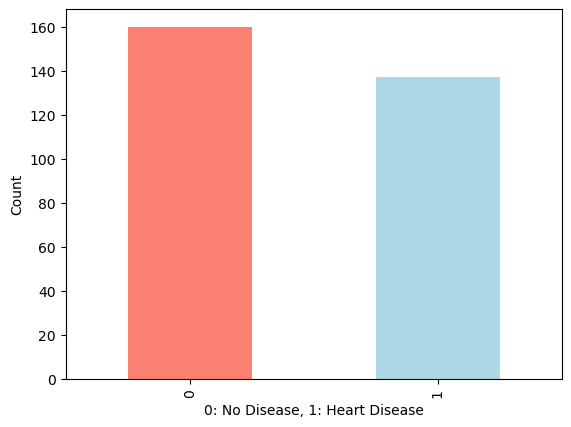

In [389]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

In [390]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [391]:
df['sex'].value_counts()

sex
1    201
0     96
Name: count, dtype: int64

In [392]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,71,25
1,89,112


In [393]:
71/(71+25), 89/(89+112)

(0.7395833333333334, 0.4427860696517413)

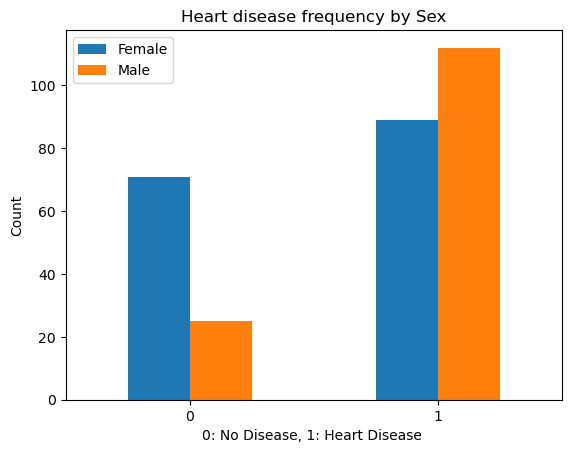

In [394]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: No Disease, 1: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [395]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

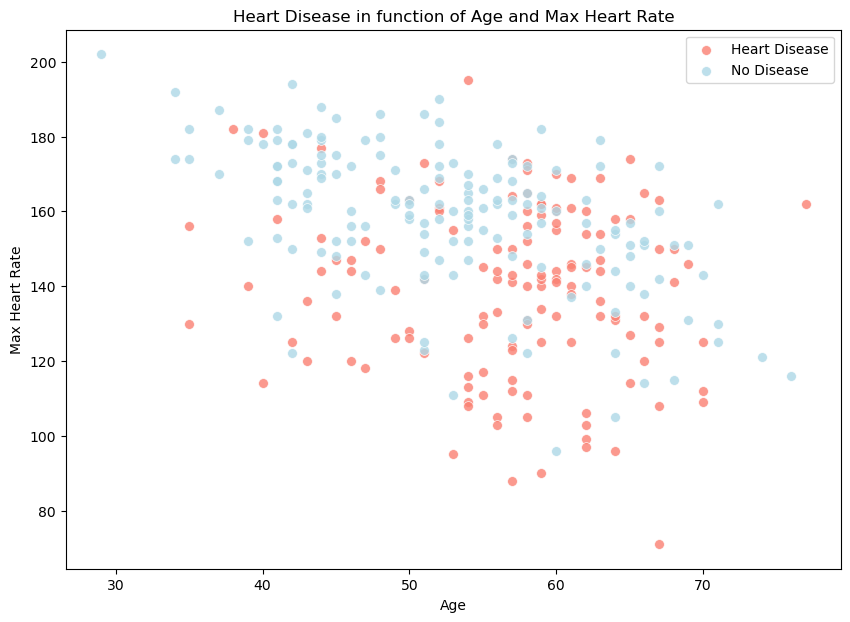

In [396]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data=df, x=df.age[df.target==1], y=df.thalach[df.target==1], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data=df, x=df.age[df.target==0], y=df.thalach[df.target==0], color='lightblue', s=50, alpha=0.8)

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');
plt.legend(['Heart Disease', 'No Disease']);


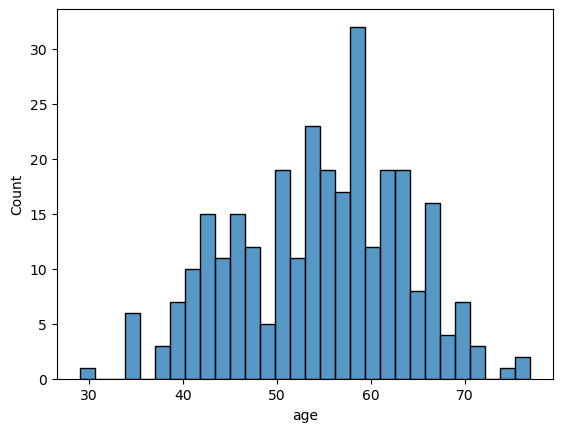

In [397]:
sns.histplot(data=df, x=df['age'], bins=30);

In [398]:
pd.crosstab(df['target'], df['cp'])

cp,1,2,3,4
target,,,,
0,16,40,65,39
1,7,9,18,103


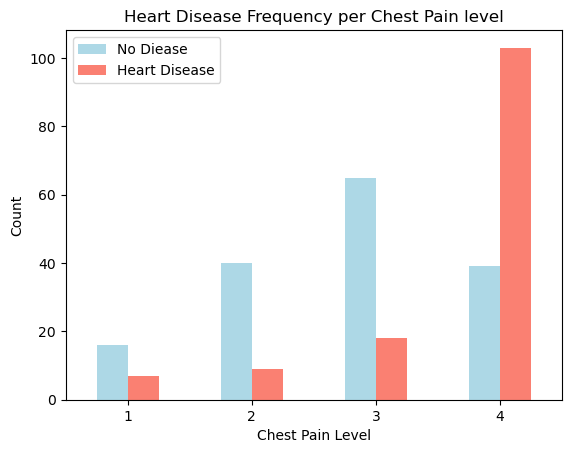

In [399]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

In [400]:
df.corr()['target'][:-1]

age         0.227075
sex         0.278467
cp          0.408945
trestbps    0.153490
chol        0.080285
fbs         0.003167
restecg     0.166343
thalach    -0.423817
exang       0.421355
oldpeak     0.424052
slope       0.333049
ca          0.463189
thal        0.526640
Name: target, dtype: float64

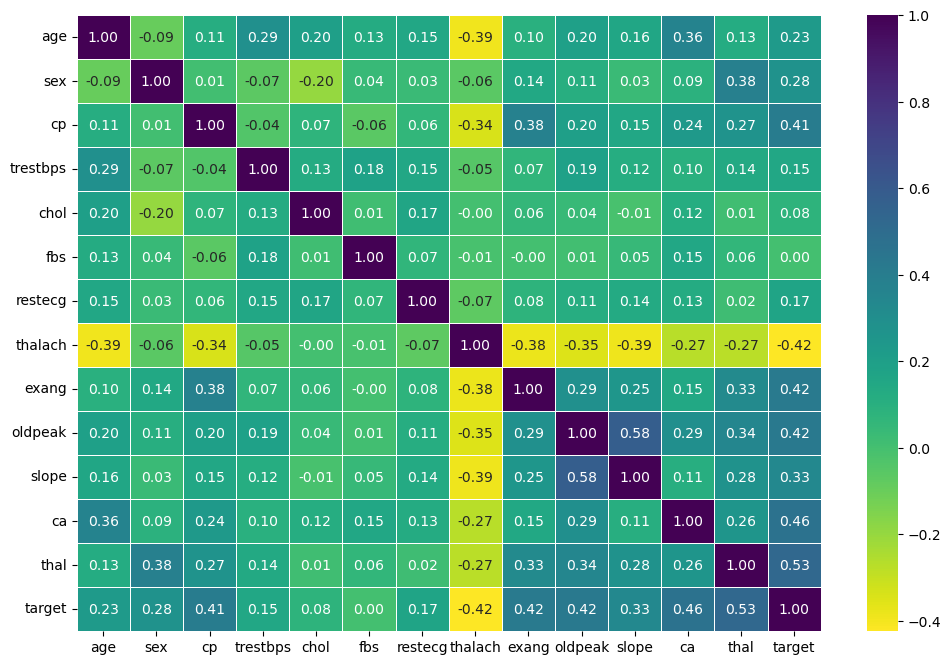

In [401]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

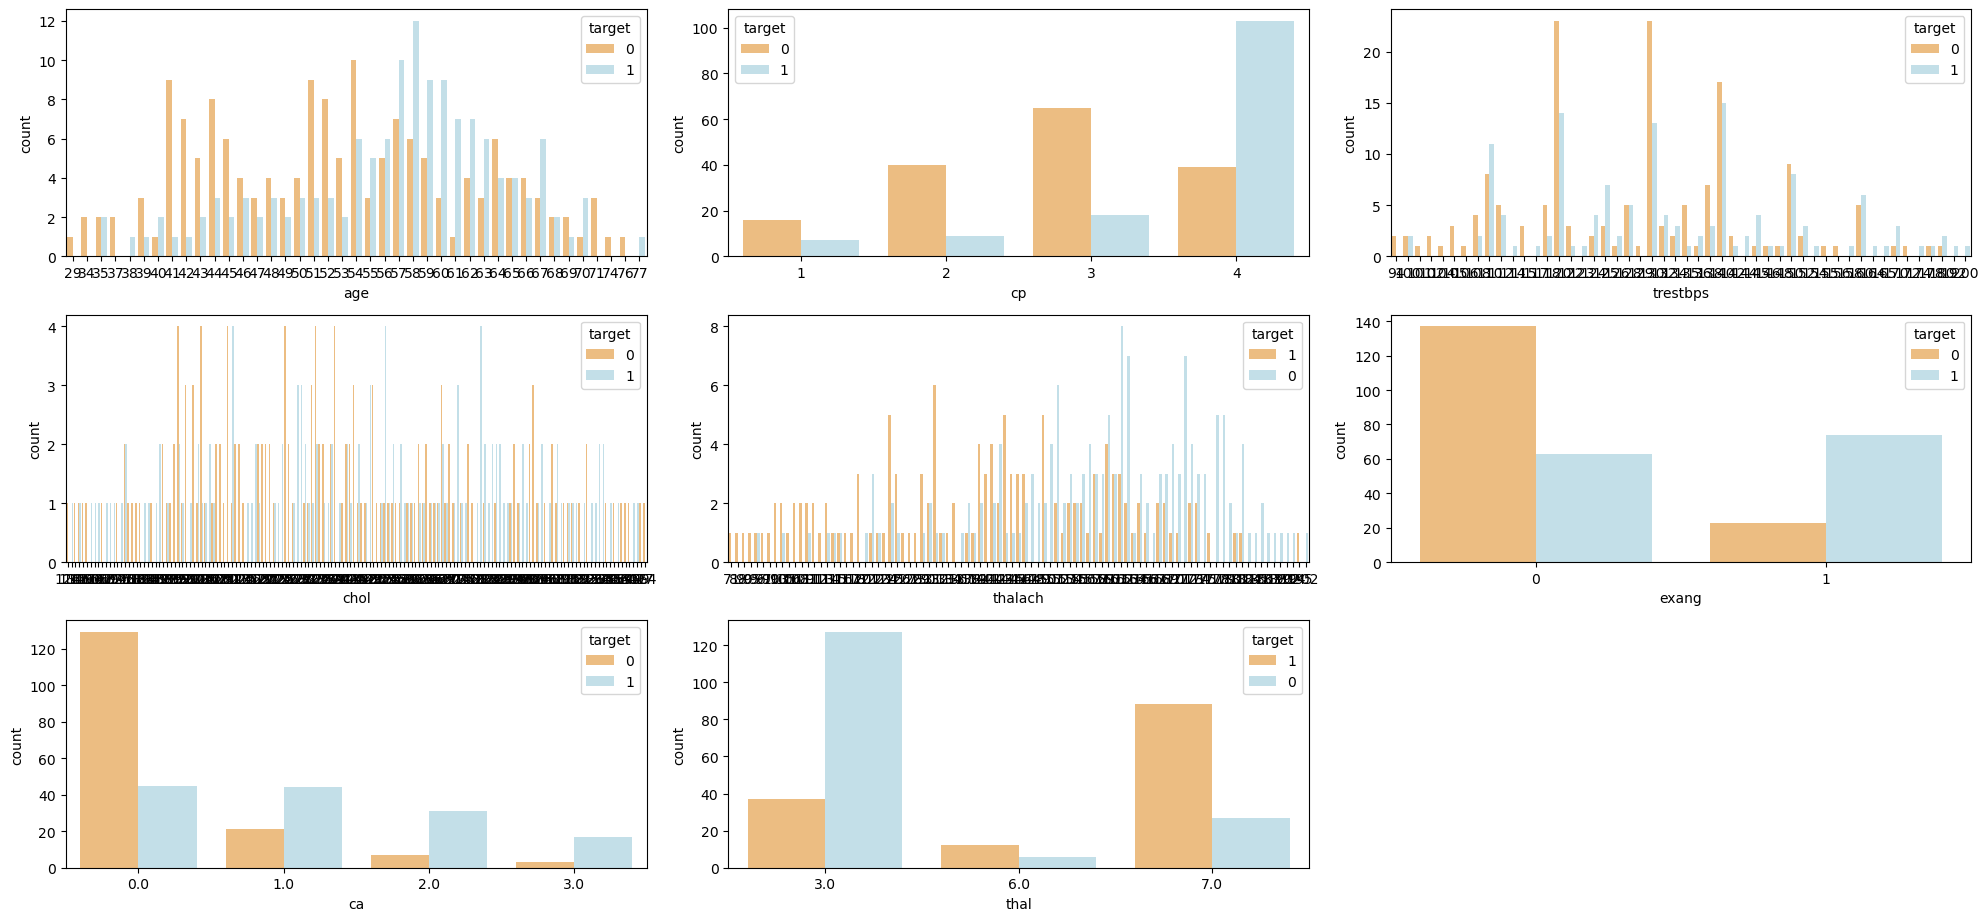

In [402]:

# barplot  
cast_list = ['age','cp','trestbps','chol','thalach','exang', 'ca','thal']

# Ensure 'target' is treated as a categorical variable
df['target'] = df['target'].astype(str)

fig = plt.figure(figsize=(20, 15))

for i in range(len(cast_list)):
    column = cast_list[i]
    sub = fig.add_subplot(5, 3, i + 1)
    chart = sns.countplot(data=df, x=column, hue='target', palette='RdYlBu')

plt.tight_layout()
plt.show()    

3 .Model Building: Sau khi dữ liệu được xử lý, sử dụng dữ liệu này để xây dựng mô hình Học
 máy

In [403]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1


In [404]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [405]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 13), (60, 13), (237,), (60,))

## Model training

In [407]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [408]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8833333333333333,
 'KNN': 0.6833333333333333,
 'RandomForestClassifer': 0.8833333333333333}

In [409]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.883333,0.683333,0.883333


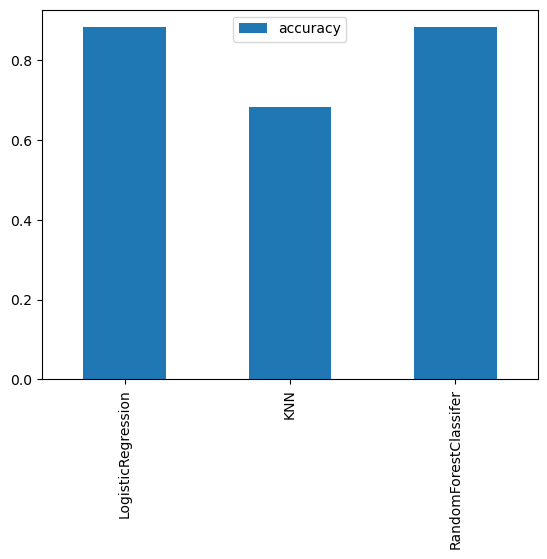

In [410]:
model_compare.T.plot(kind='bar');


# Tuning or Improving our models

# Hyperparameter Tuning - using GridSearchCV

In [411]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [412]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [413]:
# get the score
gs_log_reg.score(X_test, y_test)

0.8833333333333333

# Evaluating Models

In [414]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

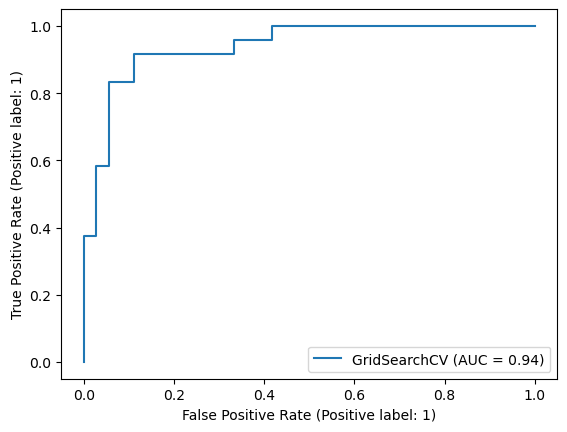

In [415]:
from sklearn.metrics import RocCurveDisplay

# ROC curve and AUC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [416]:
confusion_matrix(y_test, y_preds)

array([[32,  4],
       [ 3, 21]], dtype=int64)

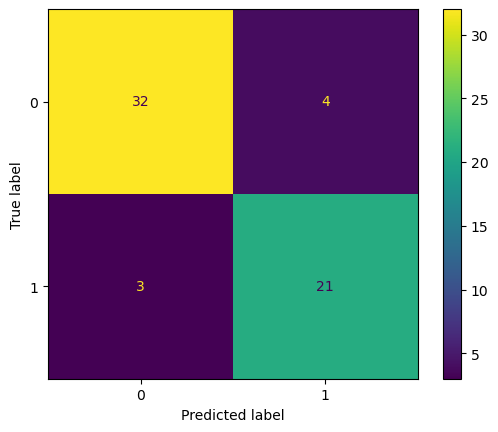

In [417]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [418]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## Calculate evaluation metrics using Cross Validated Precision, Recall and F1 score

In [419]:
# check current best parameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [420]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [421]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
cv_accuracy

array([0.88333333, 0.83333333, 0.79661017, 0.81355932, 0.81355932])

In [422]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8280790960451977

In [423]:

# Cross Validated Precision
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

# Đảm bảo rằng các nhãn là số nguyên
y = y.astype(int)

# Tạo scorer với các nhãn hợp lệ
precision_scorer = make_scorer(precision_score, labels=[0, 1], pos_label=1)

# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring=precision_scorer, cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.844733031211667

In [424]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

0.7801587301587302

In [425]:
# Cross Validated F1
cv_f1 = cross_val_score(clf, X, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.80656262505002

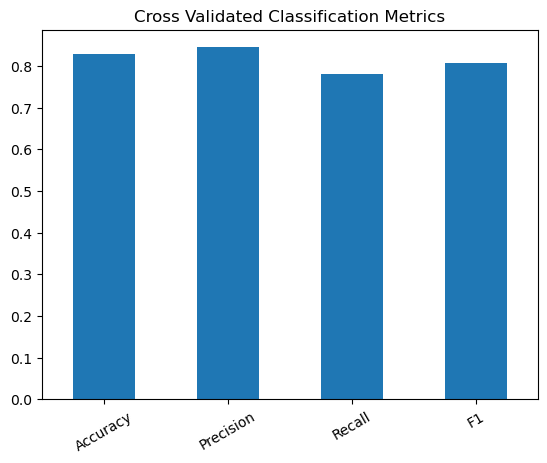

In [426]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);  

## Feature Importance

In [427]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [428]:
# check Coefficient of features
model.coef_

array([[-0.03377565,  0.59857416,  0.25617496,  0.01694046,  0.0034008 ,
        -0.41845641,  0.21039985, -0.03499834,  0.50344364,  0.33489452,
         0.0552971 ,  0.94418239,  0.32023606]])

In [429]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1


In [430]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

{'age': -0.03377565307786529,
 'sex': 0.5985741641781281,
 'cp': 0.25617496313652927,
 'trestbps': 0.0169404572894673,
 'chol': 0.003400802628082637,
 'fbs': -0.41845641034769565,
 'restecg': 0.2103998460002623,
 'thalach': -0.0349983417534683,
 'exang': 0.503443639839801,
 'oldpeak': 0.33489452351612675,
 'slope': 0.05529709748667821,
 'ca': 0.9441823903349378,
 'thal': 0.32023606227505386}

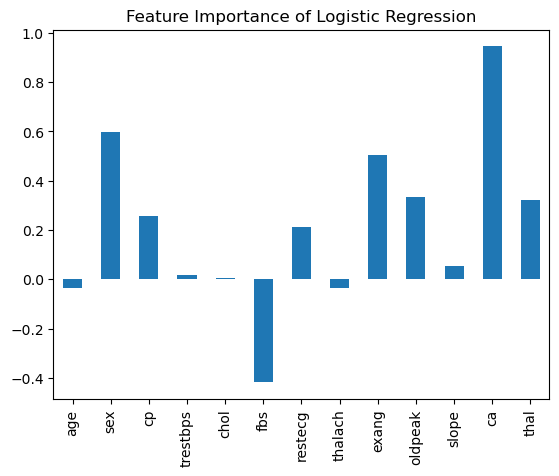

In [431]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [432]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [433]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [434]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [435]:
def predict_Heart_Disease(age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):    
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = trestbps
    x[4] = chol
    x[5] = fbs
    x[6] = restecg
    x[7] = thalach
    x[8] = exang
    x[9] = oldpeak
    x[10] = slope
    x[11] = ca
    x[12] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([x])[0]

In [437]:
predict_Heart_Disease(41,1,3,112,250,0,0,179,0,0,1,0,3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0'